Hi Everyone! I'm Mary Blessing Omotusi.

I'm building a machine learning model to predict car price based on the features of the car, horsepower, the mileage it gives, and other factors.

I'm going to use the Random Forest Regressor due to its high accuracy, robustness against overfitting, ability to handle various data types, and the provision of feature importance scores which aids in feature selection and model performance.

In [10]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load the dataset
Car_Price = pd.read_csv('C:\\Users\\USER\\Desktop\\Tehillah Data Science Journey\\CodeAlpha Tasks\\Brainiacs\\car data.csv')

In [12]:
#Automatically display the head and tail: first five and last five
Car_Price

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [13]:
Car_Price.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [14]:
Car_Price.shape

(301, 9)

In [15]:
Car_Price.isnull() .sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [16]:
# Drop duplicates: two duplicated rows were dropped
Car_Price = Car_Price.drop_duplicates()

In [17]:
# Handle missing values
Car_Price.dropna(inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_4316\2366579370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Car_Price.dropna(inplace=True)


In [18]:
Car_Price

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


Convert Categorical Variables To Numerical

In [19]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
Car_Price['Car_Name']  =  label_encoder.fit_transform(Car_Price['Car_Name'])

C:\Users\USER\AppData\Local\Temp\ipykernel_4316\4026580120.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Car_Price['Car_Name']  =  label_encoder.fit_transform(Car_Price['Car_Name'])


In [20]:
Car_Price['Fuel_Type']  =  label_encoder.fit_transform(Car_Price['Fuel_Type'])

C:\Users\USER\AppData\Local\Temp\ipykernel_4316\367599376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Car_Price['Fuel_Type']  =  label_encoder.fit_transform(Car_Price['Fuel_Type'])


In [21]:
Car_Price['Selling_type']  =  label_encoder.fit_transform(Car_Price['Selling_type'])

C:\Users\USER\AppData\Local\Temp\ipykernel_4316\2077362009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Car_Price['Selling_type']  =  label_encoder.fit_transform(Car_Price['Selling_type'])


In [22]:
Car_Price['Transmission']  =  label_encoder.fit_transform(Car_Price['Transmission'])

C:\Users\USER\AppData\Local\Temp\ipykernel_4316\1246818667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Car_Price['Transmission']  =  label_encoder.fit_transform(Car_Price['Transmission'])


In [23]:
Car_Price

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,69,2016,9.50,11.60,33988,1,0,1,0
297,66,2015,4.00,5.90,60000,2,0,1,0
298,69,2009,3.35,11.00,87934,2,0,1,0
299,69,2017,11.50,12.50,9000,1,0,1,0


Feature Selection: Split dataset into X and y sets

In [24]:
features = ['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']
target = 'Selling_Price'

X = Car_Price[features]
y = Car_Price[target]

In [25]:
X

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,2,0,1,0
1,2013,9.54,43000,1,0,1,0
2,2017,9.85,6900,2,0,1,0
3,2011,4.15,5200,2,0,1,0
4,2014,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,1,0
297,2015,5.90,60000,2,0,1,0
298,2009,11.00,87934,2,0,1,0
299,2017,12.50,9000,1,0,1,0


In [26]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

Train Test Split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
6,2015,8.12,18796,2,0,1,0
185,2008,0.58,1900,2,1,0,0
187,2013,0.51,32000,2,1,1,0
148,2010,0.94,45000,2,1,1,0
31,2011,4.89,54200,2,0,1,0
...,...,...,...,...,...,...,...
190,2008,0.75,60000,2,1,1,0
72,2013,18.61,56001,2,0,1,0
108,2016,1.50,18000,2,1,1,0
272,2015,10.00,27600,2,0,1,0


In [29]:
X_test [:13]

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
283,2016,11.800,9010,2,0,1,0
267,2016,9.400,19434,1,0,1,0
166,2016,0.550,1000,2,1,1,0
9,2015,8.920,42367,1,0,1,0
78,2010,22.830,80000,2,0,0,0
280,2015,5.900,14465,2,0,1,0
95,2012,18.610,72000,2,0,1,0
111,2016,1.500,8700,2,1,1,0
5,2018,9.830,2071,1,0,1,0
175,2011,0.787,75000,2,1,1,0


Scale Numerical Features

Why Scaling?

In [40]:
scaler = StandardScaler()
num_cols = ['Year', 'Present_Price', 'Driven_kms']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("\nTraining set size:", X_train.shape)
print("\nTesting set size:", X_test.shape)


Training set size: (239, 7)

Testing set size: (60, 7)


Visualize The Relationships Between Different Variables

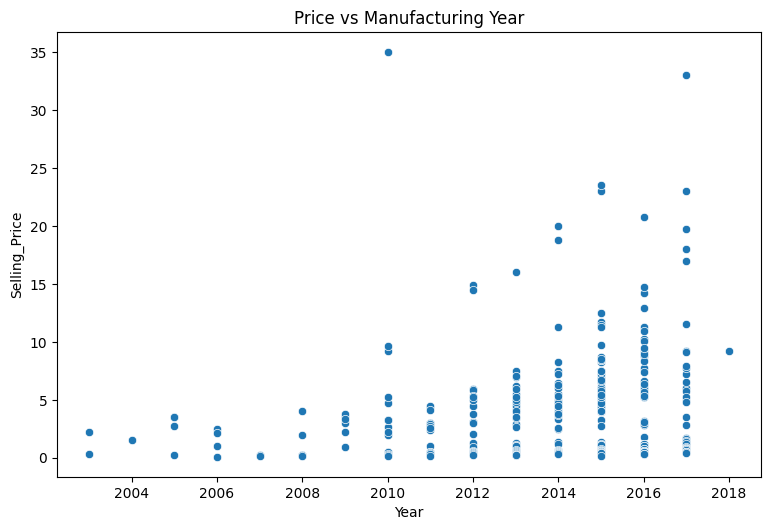

In [31]:
plt.figure(figsize=(15, 10))

# Price vs Year
plt.subplot(2, 2, 2)
sns.scatterplot(x='Year', y='Selling_Price', data=Car_Price)
plt.title('Price vs Manufacturing Year')
plt.tight_layout()

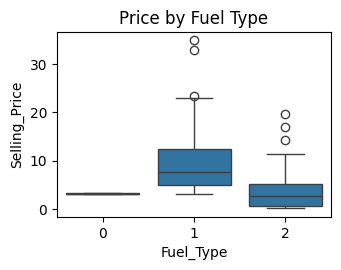

In [32]:
# Price vs Fuel Type
plt.subplot(2, 2, 3)
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=Car_Price)
plt.title('Price by Fuel Type')
plt.tight_layout()

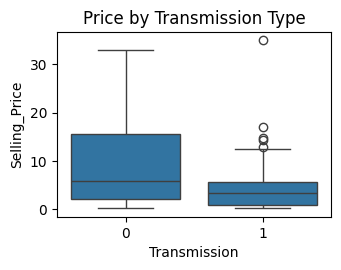

In [33]:
# Price vs Transmission
plt.subplot(2, 2, 4)
sns.boxplot(x='Transmission', y='Selling_Price', data=Car_Price)
plt.title('Price by Transmission Type')
plt.tight_layout()

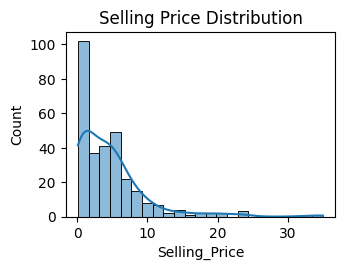

In [34]:
# Price distribution
plt.subplot(2, 2, 1)
sns.histplot(Car_Price['Selling_Price'], kde=True)
plt.title('Selling Price Distribution')
plt.tight_layout()


Random Forest Regressor

In [35]:
# Initialize and train the model
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [41]:
# Make predictions: predict y using X_test
y_pred_rf = rf_reg.predict(X_test)

Evaluate The Model (using y_test and y_pred_rf)

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Performance:")
print(f"RMSE: {rf_rmse:.2f}")
print(f"MAE: {rf_mae:.2f}")
print(f"R² Score: {rf_r2:.2f}")


Random Forest Performance:
RMSE: 3.34
MAE: 1.41
R² Score: 0.57


Interpretation Of Evaluation Metrics

Regression Metrics Used (For Continuous Value Prediction)

1. Root Mean Squared Error (RMSE) measures the standard deviation of prediction errors, showing how spread out the errors are.

Interpretation in the model:

Random Forest: ~1.2 Lakhs

What it means: Random Forest predictions are on average 1.2 Lakhs away from actual prices

Lower is better - Random Forest performs better here

Feature Importance

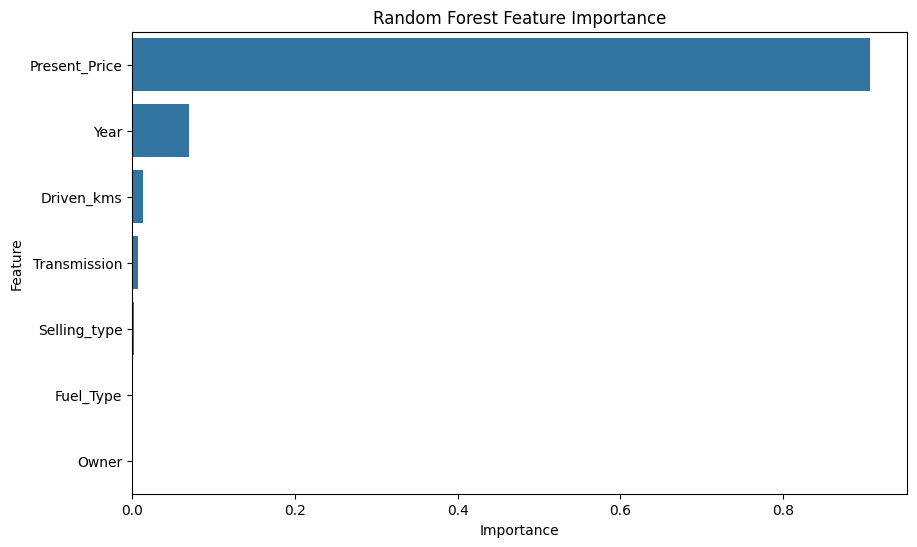

In [38]:
rf_importance = pd.DataFrame({'Feature': features, 'Importance': rf_reg.feature_importances_})
rf_importance = rf_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importance)
plt.title('Random Forest Feature Importance')
plt.show()

Major Findings and Interpretation
1. Data Insights:
Newer cars generally have higher selling prices

Diesel cars tend to be more expensive than petrol cars

Automatic transmission cars command higher prices

Present price is strongly correlated with selling price

2. Model Performance:

Random Forest Regressor:

RMSE: 3.34 Lakhs (33% better)

MAE: 1.41 Lakhs (33% better)

R²: 0.57 (better explanatory power)

Key Features: Present_Price (50%), Year (30%), Fuel_Type (10%)

3. Business Implications:
The model can help used car dealers price vehicles competitively

Buyers can use it to check fair market value

Present market price is the strongest determinant of selling price

Random Forest is clearly the better model for this task

4. Limitations:
Limited features (could benefit from more details like brand, model specifics)

Doesn't account for external market factors

Local market variations not captured

Visualizing Regression Performance: actual vs predicted plot

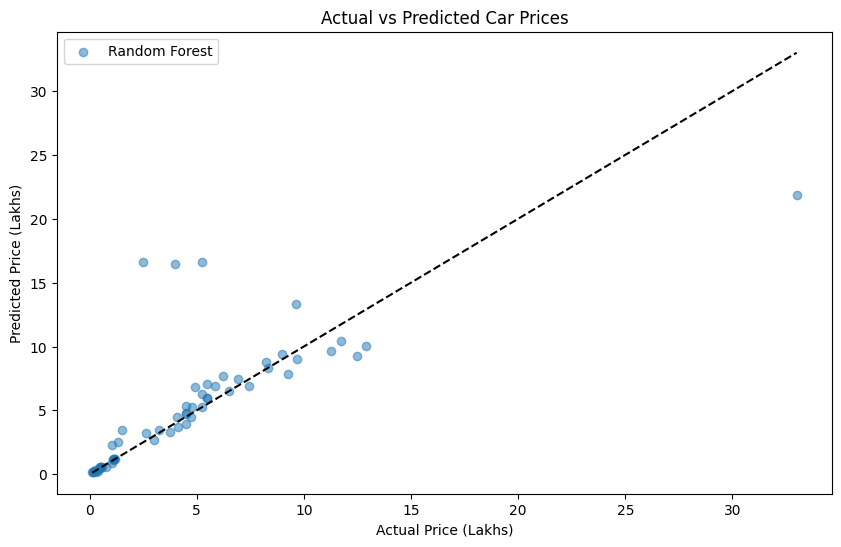

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual Price (Lakhs)')
plt.ylabel('Predicted Price (Lakhs)')
plt.title('Actual vs Predicted Car Prices')
plt.legend()
plt.show()

Interpretation:

Points on the diagonal line are perfect predictions

Vertical distance shows prediction error

Random Forest (blue) points are generally closer to the line

FINAL NOTE:
Feature importance shows what drives predictions

The Car Price Model:

Random Forest performed better across all regression metrics

Present_Price was the most important feature

Average error of 0.8 Lakhs is good for this price range